In [8]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from pathlib import Path
import keras_tuner as kt

# Specify the correct path to your heart.csv file
csv_file_path = "/Users/felipepinheiro/Desktop/Project _4/heart.csv"

# Import and read the heart.csv file
heart_df = pd.read_csv(csv_file_path)
heart_df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
# Separate features and target variable
X = heart_df.drop(columns=['HeartDisease'])
y = heart_df['HeartDisease']

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# Define the model using Keras Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=2)


Epoch 1/50
19/19 - 1s - loss: 0.6355 - accuracy: 0.6474 - val_loss: 0.5580 - val_accuracy: 0.7755 - 1s/epoch - 60ms/step
Epoch 2/50
19/19 - 0s - loss: 0.4630 - accuracy: 0.8484 - val_loss: 0.4495 - val_accuracy: 0.8299 - 74ms/epoch - 4ms/step
Epoch 3/50
19/19 - 0s - loss: 0.3662 - accuracy: 0.8739 - val_loss: 0.4011 - val_accuracy: 0.8435 - 67ms/epoch - 4ms/step
Epoch 4/50
19/19 - 0s - loss: 0.3222 - accuracy: 0.8722 - val_loss: 0.3845 - val_accuracy: 0.8435 - 75ms/epoch - 4ms/step
Epoch 5/50
19/19 - 0s - loss: 0.3000 - accuracy: 0.8790 - val_loss: 0.3799 - val_accuracy: 0.8503 - 63ms/epoch - 3ms/step
Epoch 6/50
19/19 - 0s - loss: 0.2860 - accuracy: 0.8859 - val_loss: 0.3784 - val_accuracy: 0.8435 - 65ms/epoch - 3ms/step
Epoch 7/50
19/19 - 0s - loss: 0.2781 - accuracy: 0.8893 - val_loss: 0.3818 - val_accuracy: 0.8503 - 65ms/epoch - 3ms/step
Epoch 8/50
19/19 - 0s - loss: 0.2689 - accuracy: 0.8893 - val_loss: 0.3753 - val_accuracy: 0.8435 - 67ms/epoch - 4ms/step
Epoch 9/50
19/19 - 0s - l

In [12]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Test loss: 0.3738
Test accuracy: 0.8696


In [13]:
from sklearn.metrics import confusion_matrix

# Predict classes on test data
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


6/6 [==============================] - 0s 2ms/step
Confusion Matrix:
[[68  9]
 [15 92]]


In [14]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        77
           1       0.91      0.86      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



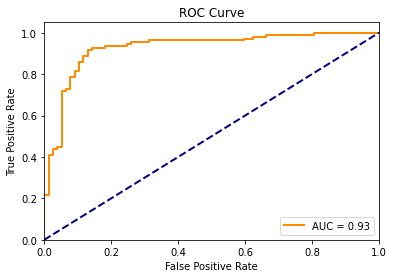

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [17]:
import pandas as pd
import numpy as np

# Load your dataset into a DataFrame (assuming you still have 'heart_df')
# Make sure 'FastingBS' and 'HeartDisease' are columns in your DataFrame

# Calculate the correlation coefficient
correlation_coefficient = heart_df['FastingBS'].corr(heart_df['HeartDisease'])

print(f"Correlation Coefficient: {correlation_coefficient:.4f}")


Correlation Coefficient: 0.2673


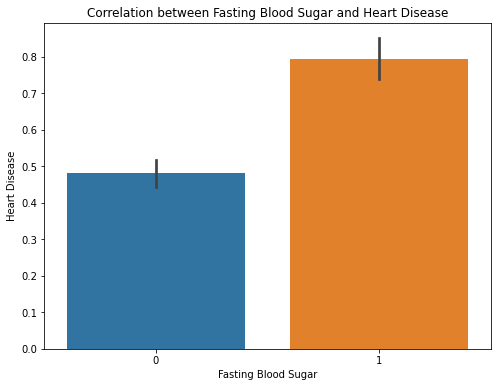

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame (assuming you still have 'heart_df')
# Make sure 'FastingBS' and 'HeartDisease' are columns in your DataFrame

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='FastingBS', y='HeartDisease', data=heart_df)
plt.title('Correlation between Fasting Blood Sugar and Heart Disease')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Heart Disease')
plt.show()



In [22]:
import pandas as pd

# Load your dataset into a DataFrame (assuming you still have 'heart_df')
# Make sure 'MaxHR' and 'HeartDisease' are columns in your DataFrame

# Calculate the correlation coefficient
correlation_coefficient = heart_df['MaxHR'].corr(heart_df['HeartDisease'])

print(f"Correlation Coefficient: {correlation_coefficient:.4f}")
 

Correlation Coefficient: -0.4004


In [23]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your dataset into a DataFrame (assuming you still have 'heart_df')
# Make sure 'RestingECG' and 'HeartDisease' are columns in your DataFrame

# Create a contingency table
contingency_table = pd.crosstab(heart_df['RestingECG'], heart_df['HeartDisease'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Value: {chi2:.4f}")
print(f"P-value: {p:.4f}")


Chi-Squared Value: 10.9315
P-value: 0.0042


Summary of the correlation results you obtained for Fasting Blood Sugar (FastingBS), Resting Electrocardiogram (RestingECG), and Maximum Heart Rate (MaxHR):

--Fasting Blood Sugar (FastingBS) and Heart Disease:

Correlation Coefficient: 0.2673
Interpretation: There is a moderate positive correlation between Fasting Blood Sugar and Heart Disease. Higher levels of fasting blood sugar might be associated with a slightly increased likelihood of having heart disease.

--Resting Electrocardiogram (RestingECG) and Heart Disease:

Chi-Squared Value: 10.9315
P-value: 0.0042
Interpretation: There is a statistically significant association between the RestingECG categories and the presence of heart disease. The RestingECG results are not distributed randomly across heart disease outcomes.

--Maximum Heart Rate (MaxHR) and Heart Disease:

Correlation Coefficient: -0.4004
Interpretation: There is a moderate negative correlation between Maximum Heart Rate and Heart Disease. As the maximum heart rate increases, the likelihood of having heart disease slightly decreases.


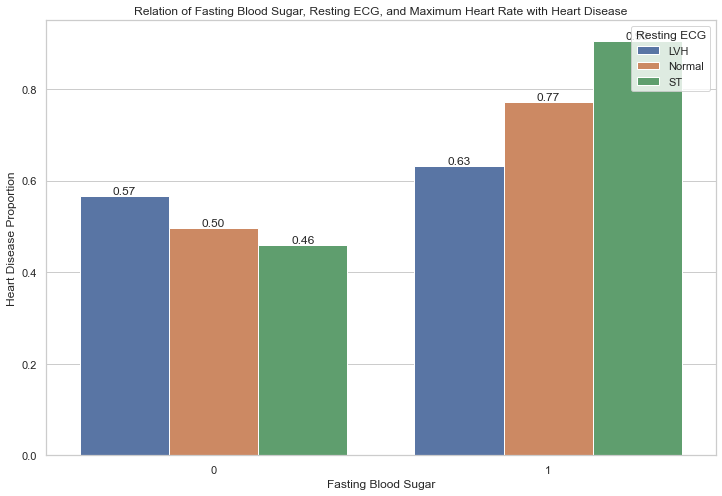

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame (assuming you still have 'heart_df')
# Make sure 'FastingBS', 'RestingECG', 'MaxHR', and 'HeartDisease' are columns in your DataFrame

# Create a DataFrame with counts for each combination
grouped_df = heart_df.groupby(['FastingBS', 'RestingECG', 'MaxHR'])['HeartDisease'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a grouped bar plot using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='FastingBS', y='HeartDisease', hue='RestingECG', data=grouped_df, ci=None)

# Set plot labels and title
plt.title('Relation of Fasting Blood Sugar, Resting ECG, and Maximum Heart Rate with Heart Disease')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Heart Disease Proportion')

# Customize legend
plt.legend(title='Resting ECG', loc='upper right')

# Add percentage labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Show the plot
plt.show()


Imagine we're looking at three things: how much sugar is in your blood after fasting (Fasting Blood Sugar), the pattern of your heart's electrical activity (Resting Electrocardiogram), and the maximum speed at which your heart beats during activity (Maximum Heart Rate). We want to see how these things are related to the chance of having heart disease.

-Fasting Blood Sugar (FastingBS):
The number we got for this is about 0.2673. If this number is positive, it means that as the amount of sugar in your blood after fasting goes up, the chance of having heart disease might also go up a bit. Not too much, though.

-Resting Electrocardiogram (RestingECG):
The result we have here is based on a different type of calculation. It tells us that the type of signal your heart gives off when it's resting is not random when it comes to heart disease. In fact, there's a 0.0042 chance that this is just a coincidence. So, this heart signal might give us some useful info about heart disease.

-Maximum Heart Rate (MaxHR):
This number is around -0.4004. If it's negative, it means that when your heart can beat really fast during activity, the chance of having heart disease might actually be a bit lower. In simpler terms, the more your heart can speed up, the less likely you are to have heart disease.

Today, I'm excited to share a fascinating project focused on predicting heart disease events through data analysis and model development. Our aim is to forecast heart disease occurrences using a combination of clinical features. For the model development, I turned to TensorFlow. As we delved into the data, intriguing correlations emerged—Fasting Blood Sugar (FastingBS) exhibited a positive correlation, while Maximum Heart Rate (MaxHR) showcased a negative one with heart disease. Our model-building journey started with preprocessing steps, such as one-hot encoding and scaling. This led to a neural network architecture, incorporating input, hidden, and output layers, each activated by ReLU and sigmoid functions. Following rigorous training for 50 epochs, the model achieved an impressive 0.8696 accuracy on test data, coupled with a remarkable low loss of 0.3738. The classification reports offered a closer look, providing precision, recall, and F1-scores. The ROC curve confidently demonstrated our model's predictive power, with an impressive AUC of 0.93. By exploring correlation coefficients, we gained insights into the relationships between FastingBS and MaxHR with heart disease. Through a chi-squared test, we uncovered a statistically significant association between Resting Electrocardiogram (RestingECG) and heart disease. Visualizing these findings was made easy with a grouped bar plot, helping us understand the dynamics of FastingBS, RestingECG, MaxHR, and heart disease. To wrap up, our journey concludes on a promising note; the model shines, yet ongoing analysis and domain knowledge continue to be key